# Data Wrangling

### Importing Required Libraries

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Progress bar
from scipy import stats

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Enable inline plotting
%matplotlib inline

# Set seaborn style for better visuals
sns.set(style="darkgrid")

print("All libraries loaded successfully!")


All libraries loaded successfully!


### Reading the dataset


In [6]:
filepath = "/content/Laptop.csv"
df = pd.read_csv(filepath, header=0)

Verify loading by displaying the dataframe summary using `dataframe.info()`


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [8]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [9]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN.


In [10]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

### Replace with mean



In [11]:
avg_weight=df['Weight_kg'].astype('float').mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

<ipython-input-11-6b821a78dbed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)


### Replace with the most frequent value



In [12]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
common_screen_size

39.62

In [13]:
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

<ipython-input-13-3a042974e81a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)


### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float".

In [14]:
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

### Data Standardization



In [15]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [17]:
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

### Data Normalization

In [16]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

### Binning

In [18]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

In [19]:
group_names = ['Low', 'Medium', 'High']

In [20]:
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

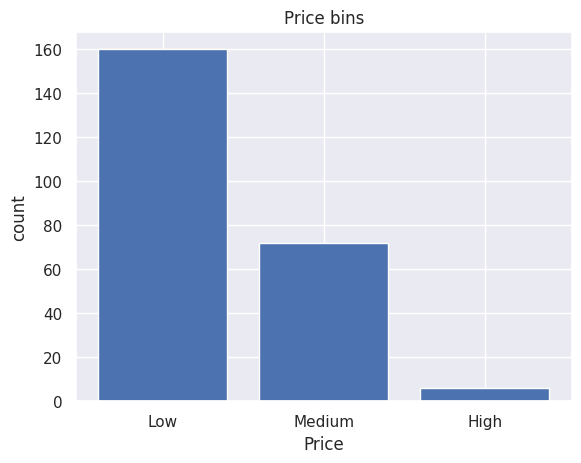

In [21]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

### Indicator variables


In [22]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [23]:
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)

In [24]:
dummy_variable_1.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [25]:
df.drop("Screen", axis = 1, inplace=True)

In [26]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_inch  \
0           0         Acer         4    2   1         5         14.000000   
1           1         Dell         3    1   1         3         15.598425   
2           2         Dell         3    1   1         7         15.598425   
3           3         Dell         4    2   1         5         13.299213   
4           4           HP         4    2   1         7         15.598425   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_pounds  Price Price-binned  
0       0.551724       8             256        3.52800    978          Low  
1       0.689655       4             256        4.85100    634          Low  
2       0.931034       8             256        4.85100    946          Low  
3       0.551724       8             128        2.69010   1244          Low  
4       0.620690       8             256        4.21155    837          Low  







# Exploratory data analysis

In [ ]:
#import piplite
#await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [27]:
df.head(5)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


## Visualize individual feature patterns




### Continuous valued features

((0.0, 3974.15),)

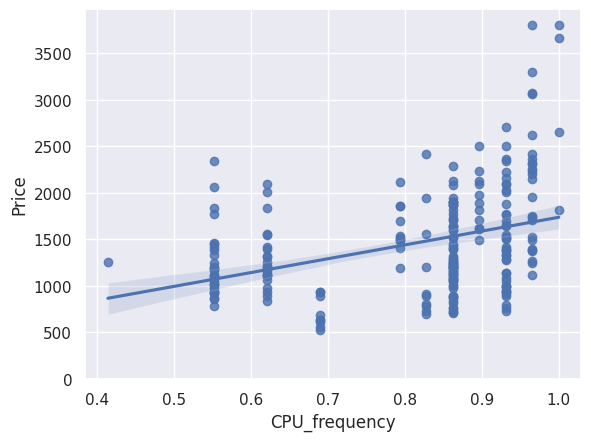

In [30]:
# CPU_frequency plot
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0),

In [31]:
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


((0.0, 3974.15),)

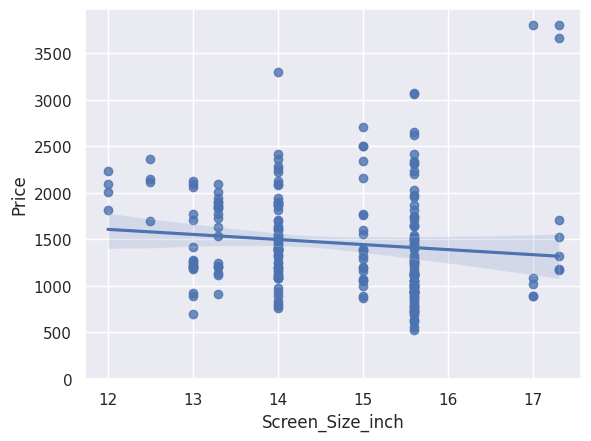

In [32]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0),

In [33]:
df[["Screen_Size_inch", "Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110565
Price,-0.110565,1.000000


((0.0, 3974.15),)

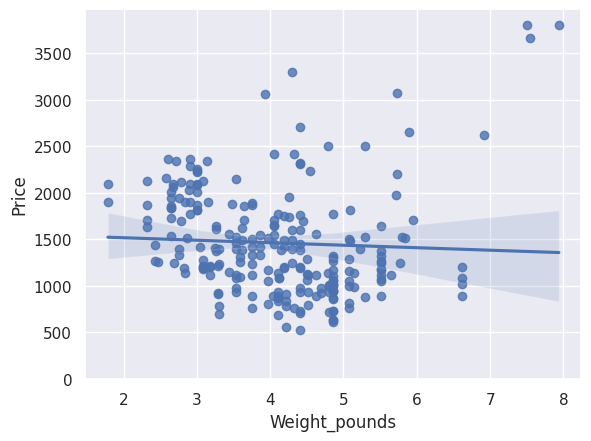

In [34]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0),

In [35]:
df[["Weight_pounds", "Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


In [36]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features visualization using box plots


<Axes: xlabel='Category', ylabel='Price'>

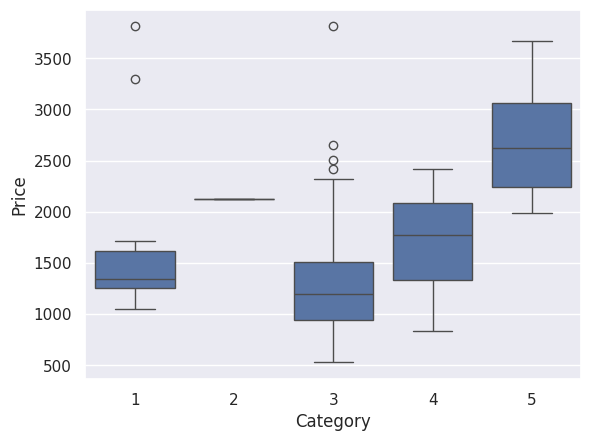

In [37]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

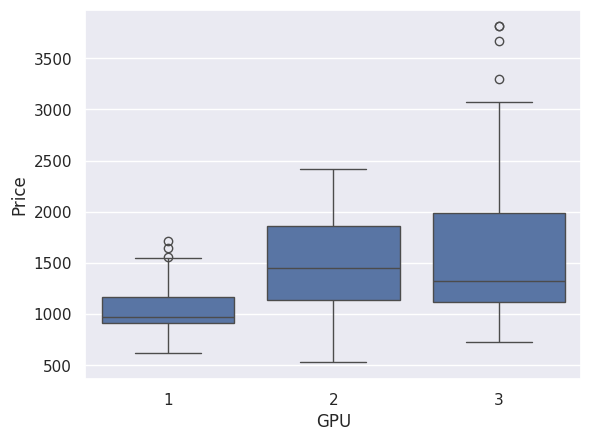

In [38]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

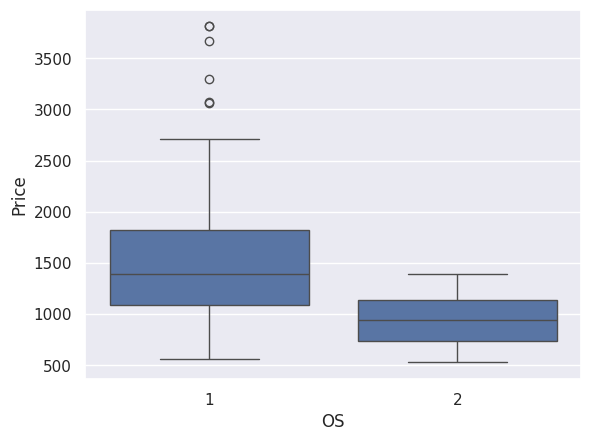

In [39]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

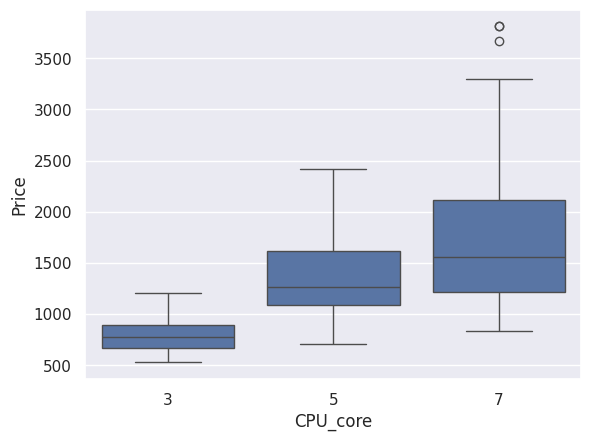

In [40]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

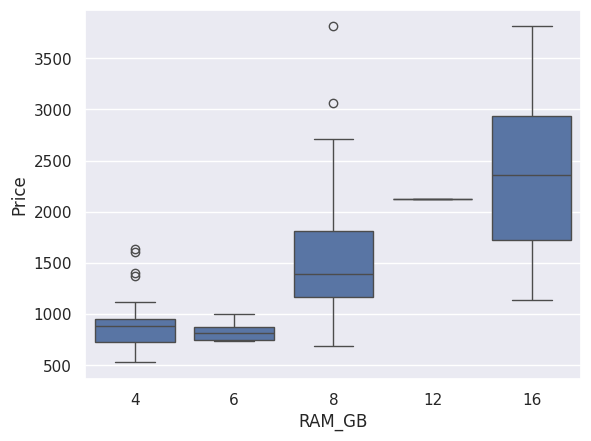

In [41]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

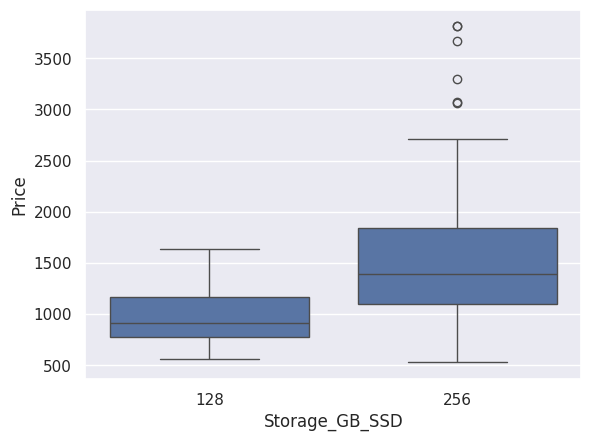

In [42]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

## Descriptive Statistical Analysis


In [43]:
print(df.describe(include=['object']))

       Manufacturer
count           238
unique           11
top            Dell
freq             71


### GroupBy and Pivot Tables




In [44]:
# Create the group
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [45]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

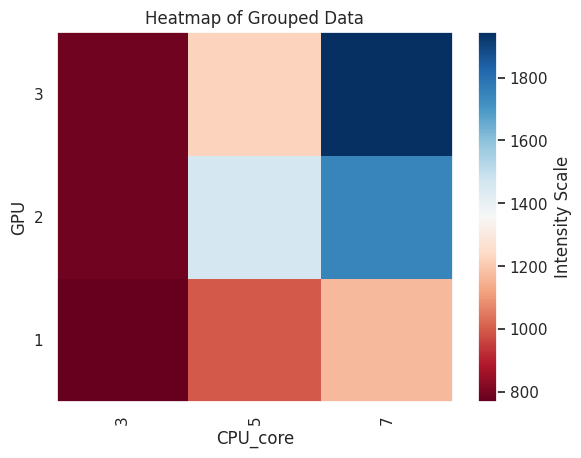

In [46]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label
plt.xticks(rotation=90)

# Add title and labels
ax.set_title("Heatmap of Grouped Data")
ax.set_xlabel("CPU_core")
ax.set_ylabel("GPU")

# Add colorbar
fig.colorbar(im, label="Intensity Scale")

plt.show()

### Pearson Correlation and p-values




In [47]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857844  with a P-value of P = 3.681560628842868e-20
The Pearson Correlation Coefficient for CPU_frequency is 0.366665558925886  with a P-value of P = 5.5024633507134225e-09
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.2434207552181029  with a P-value of P = 0.00014898923191724174
The Pearson Correlation Coefficient for Screen_Size_inch is -0.11056471275425062  with a P-value of P = 0.08876456732700777
The Pearson Correlation Coefficient for Weight_pounds is -0.05031225837751547  with a P-value of P = 0.43976938534338944
The Pearson Correlation Coefficient for CPU_core is 0.4593977773355115  with a P-value of P = 7.912950127009034e-14
The Pearson Correlation Coefficient for OS is -0.22172980114827384  with a P-value of P = 0.0005696642559246749
The Pearson Correlation Coefficient for GPU is 0.2882981988881428  with a P-value of P = 6.166949698364282e-06
The Pearson Correlation Coefficient for Category is 0.2862

# Model Development

In [48]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


In [50]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


### Using Cross validation to improve the model




In [52]:
# Divide the dataset into x_data and y_data parameters.
y_data = df['Price']
x_data = df.drop('Price',axis=1)

In [53]:
# Split the data set into training and testing subests reserving 10% of the data set for testing.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


In [54]:
# Single variable linear regression model using "CPU_frequency" parameter.
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393766
0.14829792099817962


In [55]:
# 4-fold cross validation on the model
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.16109232388595096 and the standard deviation is 0.3849579786664708


### Check overfitting


In [ ]:
# Split the data set into training and testing components reserving 50% of the data set for testing.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

In [56]:
# Indentify overfitting the model on the parameter "CPU_frequency"
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

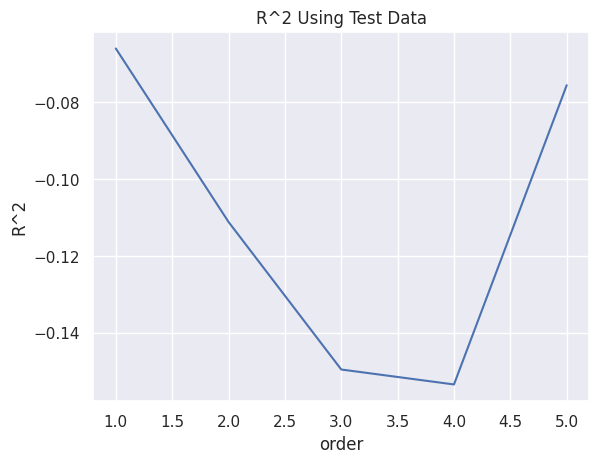

In [57]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

### Ridge Regression

In [59]:
# Polynomial feature model with degree=2
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [60]:
#  Evaluate the regression model using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:06<00:00, 145.60it/s, Test Score=0.371, Train Score=0.634]


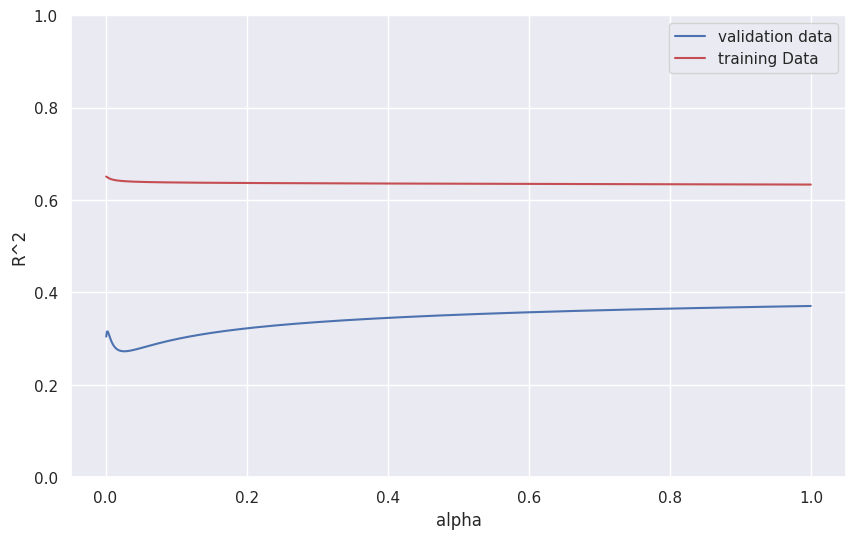

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

### Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best.
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [62]:
# To identify the value of alpha for the best model
# {0.0001, 0.001, 0.01, 0.1, 1, 10}: assumed alpha values
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [63]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [64]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [65]:
# R^2 score for the test data using the estimator that uses the derived optimum value of alpha.
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.24478039817907105
